Speicherort festlegen und "sources" als Liste definieren

In [2]:
import json

data_dir = "../data/"

sources = ["faz/",  "sz/",  "zeit/",  "spiegel/"]


Articles als Liste definiert und ein json-file mit allen articles in passenden Ordnern abgelegt

In [137]:
articles = []

for source in sources:
    with open(data_dir + source + "all-articles.json") as file: 
        tmp = json.load(file)
        articles += tmp

Insgesamt gibt es 6310 Artikel, die in Titel, Übertitel oder Abstract "Jemen" enthalten

In [138]:
len(articles)

6310

Liste relevanter Artikel erstellt und ihr jene angehängt, die Jemen im Titel oder Surtitle haben sowie ihre Anzahl bestimmt

In [139]:
relevant_articles = []

for article in articles:
    if "jemen" in article["title"].lower() or "jemen" in article["surtitle"].lower():
        relevant_articles.append(article)

len(relevant_articles)


938

2 Dataframes (zweidimensionale Datenstruktur, Tabelle/Spreadsheet) erstellt

In [7]:
import pandas as pd

rel = pd.DataFrame(relevant_articles)
all = pd.DataFrame(articles)


??Wie viele relevante Artikel gibt es pro source 

In [133]:
rel["source"].value_counts()


FAZ        377
SZ         306
Spiegel    137
Zeit       118
Name: source, dtype: int64

Wie viele Artikel gibt es pro source 

In [132]:
all["source"].value_counts()

FAZ        2411
SZ         1938
Spiegel    1343
Zeit        618
Name: source, dtype: int64

So viele Artikel haben Autoren (oder: the dirty way to find out wie viele FAZ Artikel Autoren haben)
- Liste aller Artikel mit Autoren erstellen
- Menge ausgeben lassen
- Dataframe erstellen

In [141]:
author_articles = []

for article in relevant_articles:
    if article["author"].lower() != "":
        author_articles.append(article)

len(author_articles)

aut = pd.DataFrame(author_articles)

Dataframe aller rel. Art. ohne Spiegel
Alle strings der Kategorie "date" und des Formats "%d.%m.%Y" in diesem Dataframe in datetimes umwandeln

In [ ]:
rel_sp = rel[rel["source"] != "Spiegel"]

rel_sp["date"] = pd.to_datetime(rel_sp["date"], format="%d.%m.%Y")


Plottet alle relevanten Artikel ohne Spiegel anhand ihres Datums und groupiert in Jahre

<AxesSubplot:xlabel='date'>

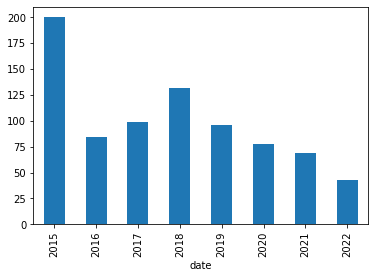

In [36]:
rel_sp['date'].groupby(rel_sp['date'].dt.year).count().plot(kind="bar")

Speichert die Dataframes in einem Dictionary namens "articlesByYear", wobei der key dem Jahr entspricht und der value dem dataframe

In [114]:
articlesByYear = {}

for year in range(2015,2023): 
    articlesByYear[year] = rel_sp[rel_sp['date'].dt.year == year]


filter data frame rows to only those rows for which the expression in the brackets evaluates to true

In [ ]:
len(articlesByYear[2021][articlesByYear[2021]["date"].dt.month == 1])

Definition für das Plotten der Balkendiagramme mit dem Titel des jeweiligen Jahres, der x-Achse Monate, der y-Achse Artikel und dem Dateinamen Jahr und dem Format jpg
Dann: clearen, damit die counts nicht einfach hinzugefügt werden

In [128]:
def plot_counts(counts, year):
    plot = counts.plot(kind="bar")
    plot.set_title(year)
    plot.set_xlabel("Monat")
    plot.set_ylabel("Artikel")
    plot.figure.savefig(str(year)+".jpg")
    plot.figure.clear()

??in counts werden die artikel nach ihrem erscheinungsmonat gruppiert und die artikel pro monat werden gezählt

??und für die monate 1-12 gilt, dass counts=0 ist, wenn der monat nicht darin vorkommt

??das ganze soll gespeichert werden

dann folgt die Plottfunktion

In [ ]:
for year, articles in articlesByYear.items():
        counts = articles['date'].groupby(rel_sp['date'].dt.month).count()
        for month in range(1,13):
            if month not in counts:
                counts.at[month] = 0
        counts.sort_index(inplace=True)
        plot_counts(counts, year)

Dictionary namens "year_info" dazu, wie viele Tage welcher Monat haben kann

In [130]:
year_info = {1: ("January", 31), 2: ("February", 28), 3: ("March", 31), 4: ("April", 30), 5: ("May", 31), 6: ("June", 30), 7: ("July", 31), 8: ("August", 31), 9: ("September", 30), 10: ("October", 31), 11: ("November", 30), 12: ("December", 31)}

## ??

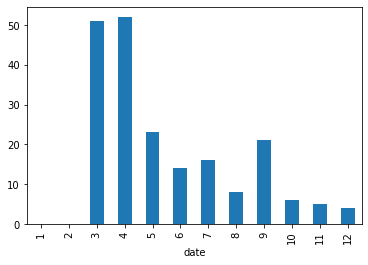

In [78]:
articles = articlesByYear[2015]

counts = articles['date'].groupby(rel_sp['date'].dt.month).count()
for month in range(1,13):
    if month not in counts:
        counts.at[month] = 0
counts.sort_index(inplace=True)
plot = counts.plot(kind="bar")
fig = plot.get_figure() 